<h1> Librerias Necesarias </h1>

In [65]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


<h1> Lectura base de datos </h1>

In [3]:
data = pd.read_csv('BOT_IOT_UNSW.csv')
data.shape

(400000, 30)

<h1> Correlación entre características </h1>

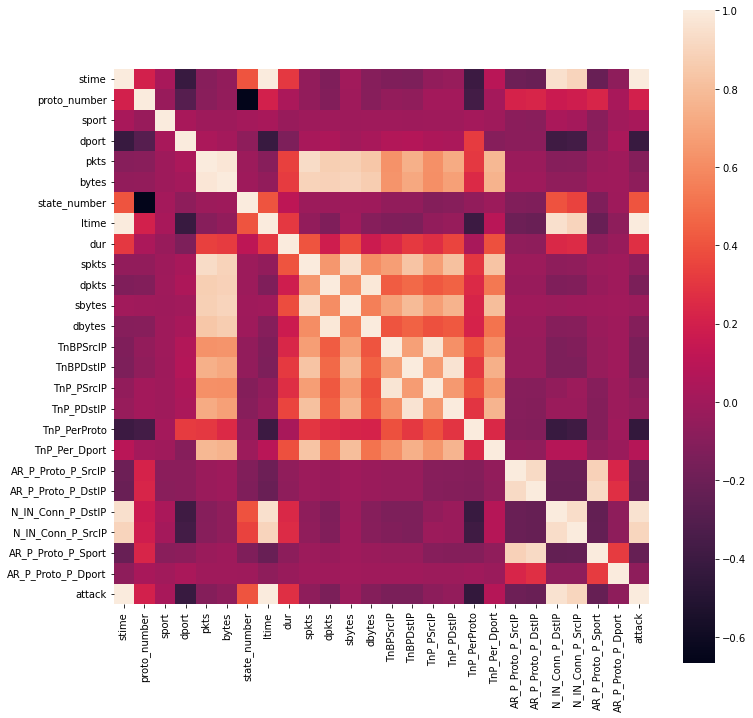

In [3]:
method = "pearson"
# correlation matrix
corr_mat = data.corr(method=method)

plt.figure(figsize=(12,12)) 
sns.heatmap(corr_mat, square=True)
plt.show()

In [4]:
# Getting and printing high correlated features
limit = 0.95

columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= limit:
            print(f"{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}")

stime                ltime                0.9999999999997443
stime                N_IN_Conn_P_DstIP    0.9518660652667059
stime                attack               0.996752378518427
pkts                 bytes                0.9790258486071393
ltime                N_IN_Conn_P_DstIP    0.9518660343123735
ltime                attack               0.9967523591805788
dpkts                dbytes               0.9806324225963877
TnBPSrcIP            TnP_PSrcIP           0.9727318497881015
TnBPDstIP            TnP_PDstIP           0.964095869499806
N_IN_Conn_P_DstIP    attack               0.9545288636352466


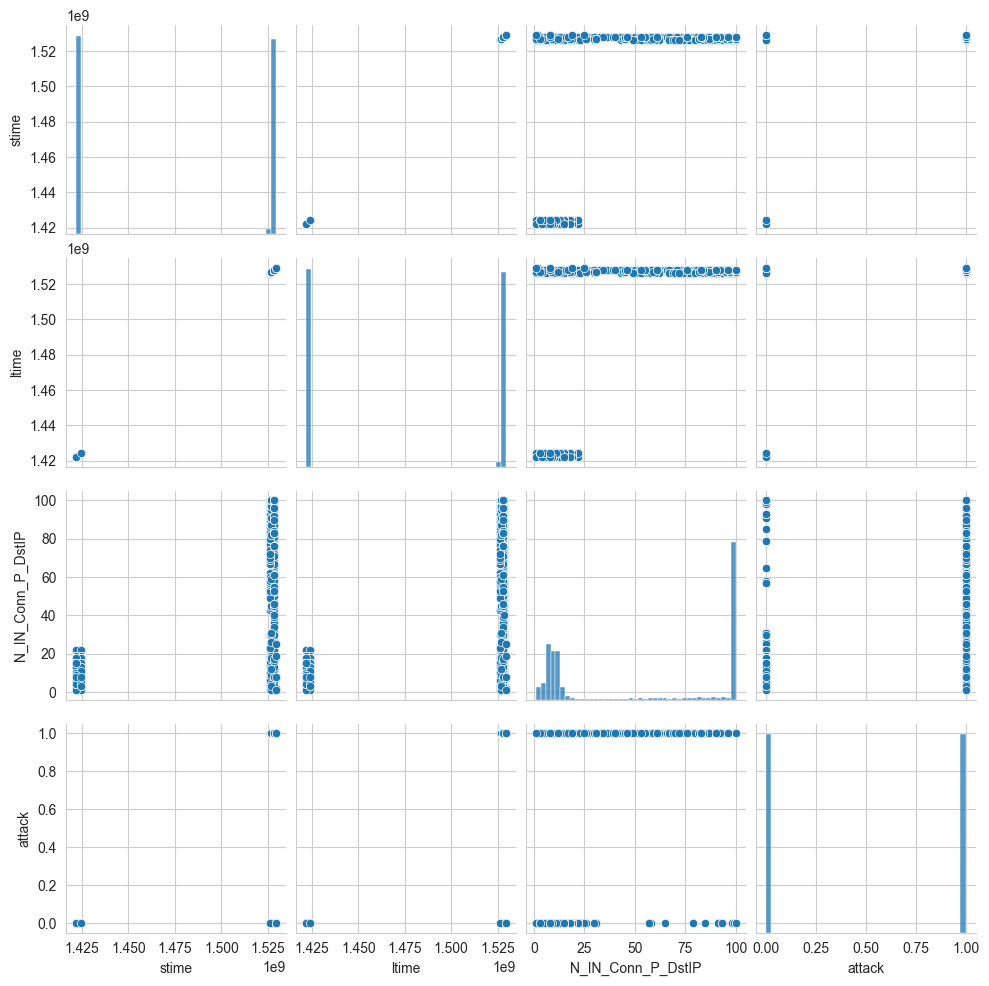

In [7]:
sns.set_style("whitegrid")
sns.pairplot(data=data, vars=['stime', 'ltime','N_IN_Conn_P_DstIP','attack'])
plt.show()

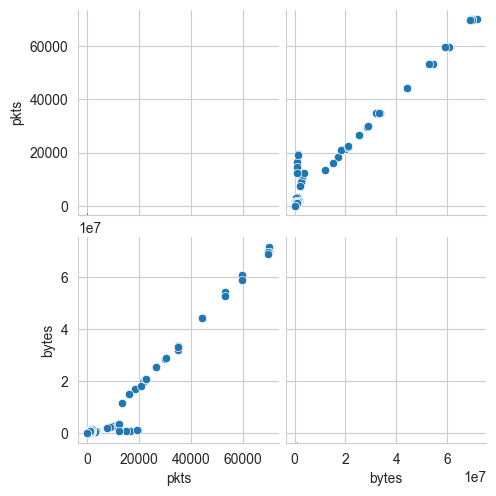

In [8]:
sns.set_style("whitegrid")
sns.pairplot(data=data, vars=['pkts', 'bytes'])
plt.show()

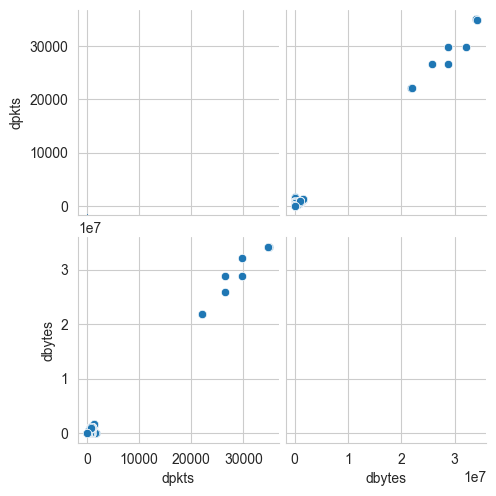

In [10]:
sns.set_style("whitegrid")
sns.pairplot(data=data, vars=['dpkts','dbytes'])
plt.show()

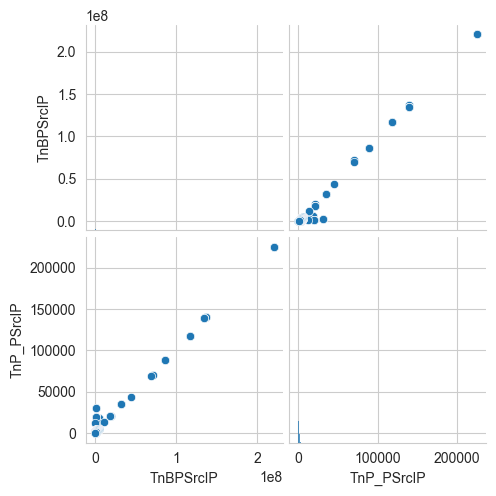

In [9]:
sns.set_style("whitegrid")
sns.pairplot(data=data, vars=['TnBPSrcIP','TnP_PSrcIP'])
plt.show()

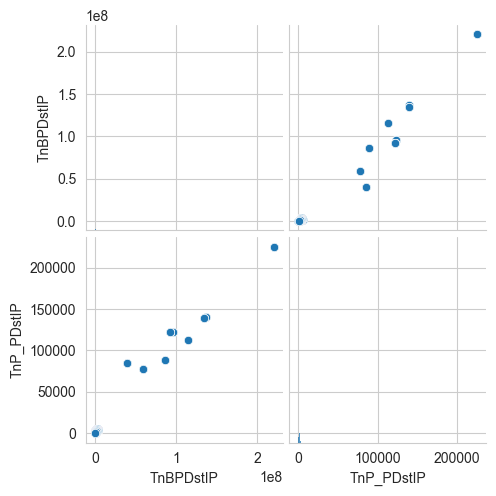

In [11]:
sns.set_style("whitegrid")
sns.pairplot(data=data, vars=['TnBPDstIP','TnP_PDstIP'])
plt.show()

<h1> División base de datos entrenameinto y Prueba </h1>

In [12]:
data_train, data_test = train_test_split(data, test_size=0.3, random_state=16)

In [28]:
data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)


* Tamaño de los conjuntos de datos

In [13]:
# Tamaño de los conjuntos de datos de entrenamiento y prueba
print("Datos de entrenamiento: ", data_train.shape,'\nDatos de prueba: ',data_test.shape)

Datos de entrenamiento:  (280000, 30) 
Datos de prueba:  (120000, 30)


* División de la clases en los conjunto de datos

En entrenamiento: Hay 50.01892857142857 % de la clase '0' BENIGN y 49.981071428571425 % de la clase '1' ATTACK
En prueba: Hay 49.95583333333333 % de la clase '0' BENIGN y 50.04416666666667 % de la clase '1' ATTACK


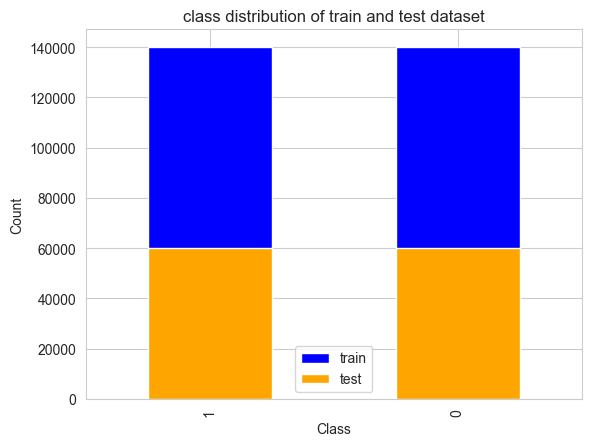

In [29]:
#División de las clases en datos de entrenamiento y pruba
train_0, train_1 = data_train['attack'].value_counts()[0] / len(data_train.index), data_train['attack'].value_counts()[1] / len(data_train.index)
test_0, test_1 = data_test['attack'].value_counts()[0] / len(data_test.index), data_test['attack'].value_counts()[1] / len(data_test.index)

print("En entrenamiento: Hay {} % de la clase '0' BENIGN y {} % de la clase '1' ATTACK".format(train_0*100, train_1*100))
print("En prueba: Hay {} % de la clase '0' BENIGN y {} % de la clase '1' ATTACK".format(test_0*100, test_1*100))

# Plotting target label distribution
plt.figure()
plt.title("class distribution of train and test dataset")
data_train['attack'].value_counts().plot(kind="bar", color='b', label="train")
data_test['attack'].value_counts().plot(kind="bar", color='orange', label="test")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend()
plt.show()

* Almacenado los conjuntos de datos

In [30]:
data_train.to_csv('./train_all_feature.csv', index=False)
data_test.to_csv('./test_all_feature.csv', index=False)

In [55]:
data_train = pd.read_csv('train_all_feature.csv')
data_test = pd.read_csv('test_all_feature.csv')

<h1> Correlación en el conjunto de entrenamiento </h1>

* Características altamente correlacionadas >0.95

In [56]:
corr_matrix = data_train.iloc[:, 0:-1].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

['bytes', 'ltime', 'dbytes', 'TnP_PSrcIP', 'TnP_PDstIP', 'N_IN_Conn_P_DstIP']


In [77]:
saved_dict = {}
saved_dict['corr_col'] = to_drop
pickle.dump(saved_dict, open('./saved_dict.pkl', 'wb'))
saved_dict = pickle.load(open('./saved_dict.pkl', 'rb'))

* Eliminando características altamente correlacionadas y almacenado las nuevas bases de datos

In [60]:
data_train.drop(columns=to_drop, inplace=True)
data_test.drop(columns=to_drop, inplace=True)

In [61]:
# Tamaño de los conjuntos de datos de entrenamiento y prueba
print("Datos de entrenamiento: ", data_train.shape,'\nDatos de prueba: ',data_test.shape)

Datos de entrenamiento:  (280000, 24) 
Datos de prueba:  (120000, 24)


In [63]:
data_train.to_csv('./train_24_feature.csv', index=False)
data_test.to_csv('./test_24_feature.csv', index=False)